# Teil 4 der Semesterarbeit: Page-Rank

Dozent: Markus Geuss  
Student: Theologos Baxevanos  
Fach: Linear Algebra  
Semester: HS20  
Schule: Fern Fachhochschule Schweiz  
Deadline: Mittwoch, 16.12.2020  

## Inhaltsverzeichnis

1. **Theorie**  
   
2. **Code**   
    
3. **Quellen**  
  
**Github Link für den Source Code:** https://github.com/greatmerlin/Teil_4_der_Semesterarbeit_Page_Rank_Theologos_Baxevanos.git

## 1. Theorie

Heutzutage, wenn wir etwas finden wollen, dann suchen es via google Webplatorm.   
Vor allem die aktuelle Generation der Kinder, weiss nicht was es bedeutet, wenn man Informationen für ein wissenschaftliches  Thema benötigt, dann muss man an die Bibliothek gehen.     
Was ist aber die Google Suche und funktioniert sie?  

Google ist eine vollautomatische Suchmaschine, die eine sogenannte Web-Crawler-Software verwendet.  
Diese durchsucht das Web regelmäßig nach Websites, die unserem Index hinzugefügt werden sollen.  
  
Eine Suchmaschine funktioniert mit dem sogennanten text based ranking.  
Wir suchen einen Suchbegrif und erhalten als Resultat die Seiten, wo dieses Wort oft vorkommt.  
Ein Wort, das häufig vorkommt (wird häufig zitiert) wird vom Google hoch eingestuft.
  
Aufgabe einer guten Suchmaschine ist, nicht nur Seiten, die ein bestimmtes Stichwort
enthalten, zu finden, sondern auch die Treffer zu sortieren. Dazu ist es notwendig,
alle Seiten zu bewerten und jeder Seite ein Gewicht Xj zuzuordnen. Für ein
sinnvolles Gewicht kann man jeden Link auf eine Seite als "Stimme" für diese Seite
ansehen. Im einfachsten Fall zählt man also die Anzahl der Seiten, die auf die i-te
Seite verlinken,als deren Gewicht. Ein Nachteil dabei ist, dass die Stimme einer Seite mit vielen
Links genauso viel zählt, wie die Stimme einer Seite mit wenigen ausgesuchten Links. [1]


Die Idee ist beliebige Suchwörter auf den HTML Source Code zu schreiben, ohne dass sie von den "Surfer" sichtbar sind.  
  
Die Frage ist aber, wie man ein Evaluationssystem implementieren kann, das eine Aussage macht, wie "relevant" eine Seite ist.  

So die erste Lösung war die "Link Analysis" (Link-Based Ranking).  
Hyperlinks sind nicht nur das strukturelle Rückgrat des einfachen, aber erfolgreichen Benutzer-Navigationsparadigmas des Web, sondern können auch als Beweis für eine Bestätigung oder Empfehlung angesehen werden. Unter dieser Annahme kann eine Seite mit mehr Empfehlungen (eingehende Links) als wichtiger angesehen werden als eine Seite mit weniger
eingehende Links. Damit eine Empfehlung relevant ist, sollte der Empfehlungsgeber jedoch über eine gewisse Autorität verfügen. Ebenso muss ein Empfehlungsgeber als maßgebliche Empfehlungsquelle angesehen werden, damit er maßgeblich ist. Eine einfache Heuristik für die Berechnung des Beliebtheitswerts von Seiten ist die Rangfolge
sie entsprechend ihrer Sichtbarkeit, d. h. durch die Anzahl der Seiten, die mit ihnen verknüpft sind. Diese einfache Heuristik war von mehreren Suchmaschinen in den frühen Tagen der Websuche angewendet. Jedoch,
Mehrere Werke erkannten, dass dieser Ansatz nicht ausgefeilt genug war
die Autorität eines Knotens zu erfassen, da er einen großen Nachteil hat: es
hält alle Links zu einer Seite für gleich wichtig. Die wichtigsten linkbasierten Ranking-Methoden kamen 1995 von Sergey Brin und Larry Page, zwei Informatikstudenten aus Stanford
Universität, die mit ihrer Web-Suchmaschine Google zusammengearbeitet hat. [4]
  
Im August 2008 verabschiedeten sie sich von Stanford, um sich darauf zu konzentrieren
ihres Projekt. [4] Sie haben also das WWW als gerichteter Digraph dargestellt. Die Pages sind die Knoten und Kanten die Hyperlinks zwischen Pages.  
Wenn man die Darstellung sieht, denkt sofort an Lineare Algebra.


![image1](image1.png)

Wir können ein Beispiel sehen und zwar, angenommen dass wir eine Webseite erstellt haben, die unser Nachbar intertessant findet. Dann teilt unsere Webseite (macht einen Hyperlink von seinem Webseite auf unsere). Vielleicht findet noch eine Webseite unsere Kontent interessant und verweisst auf unsere Page.  
Wenn eine Seite eines grossen Gewichts unsere Seite publiziert, dann ist es wichtiger als die Verweissung unser Nachbars.  
  
Nun taucht die Frage auf: Wie kann man die Wichtigkeit quantitativ entwickeln?  
Die Wichtigkeit ist abhängig von der Anzahl der Hyperlinks die in einen Page enthalten sind.  

Die Idee ist, wir programmieren einen Server und lassen ihn surfen auf das Internet. Die Wahrscheinlichkeit dass er auf eine Webpage landet, ist das **Page-Ranking**.  

Per Definition, das **Page-Rank** entspricht die Wahrscheinlichkeit mit der ein random "surfer" auf eine Webpage "j" kommt.  
Gemäss der Originalarbeit zum PageRank: "PageRang ist eine Methode zum Berechnen eines Rankings für jede Webseite basierend auf dem Diagramm des Webs. PageRank bietet Anwendungen für die Suche, das Durchsuchen und die Verkehrsschätzung." [5]


Wie kommen wir aber auf das **Mathematisches** Erklären?  

![image2](image2.png)

Wir definieren die Wahrscheinlichkeit mit der ein Surfer von dem Internet auf eine Seite kommt mit p(1) und es sind die links die von einer Page nach aussen gehen. Z.b. Hier die Wahrscheinlichkeit von Times auf mein Page ist 1/4 und von meinem Nachbarn auf meine Page 1/3.  
  
Wir müssen also die gesamte Wahrscheinlichkeit berechnen, alle Links die an unsere Seite verweisen:  
$p(j) = p(1)*(1/4) + p(2)*(1/3)$  
  
  
Nun taucht aber eine neue Frage auf, und zwar, wie berechnen wir p(1), p(2) unsw ?

p(j) = p(eingehender Knoten)* (ausgehende Kanten von p(eingehender Knoten)) + ...  

  
  


![image3](image3.png)

Für unser Beispiel erhalten wir:  
$p(1) = p(3)*(1) + p(4)*(1/2)$    
$p(2) = p(3)*(1/3)$   
$p(1) = p(1)*(1/3) + p(2)*(1/3) + p(4)*(1/2)$   
$p(1) = p(2)*(1/3) + p(1)*(1/3)$   
   
Es gilt auch: $p(1) + (p2) + ... + p(n) = 1$  
  
Dann können wir das LGS (Lineargleichungssystem) Lösen und die p(1), p(2) ... p(n) berechnen.  
So kann man das **Page Rank und das hohste Rank berechnen**.

Nun nehmen wir die Wharscheinlichkeit wahr, ein random Surfer eine Webpage zu öffnen. 
In unser Beispiel oben mit den 4 Knoten, ein random surfer hat theretisch 1/4 Chanche um einen der vier Knoten anzuwählen.  
Sobald er den ersten Kanten ausgewählt hat, dann ist es die ausgehende Kanten dieses Knoten die Wahrscheinlichkeit um sein nächstes Ziel anzuwählen.  
Das kann in einem **Baum** dargestellt werden und dann die **Adjazenz-Matrix** zu schreiben.

![image4](image4.png)

Die Adjazenz-Matrix können wir mit dem Zustandsvektor (ausgehende Kante) multiplizieren um die wahrscheinlichkeit nach zwei Entscheud zu erreichen.  
D.h. nach unsere erste Berechnung erhalten wir p(1). Das ist das erste Klick. Dann wiederholen wir unsere BErechnungen und erhalten wir p(2), das ist das zweite klick. Dann wieder und wieder bis zum p(n) -> Stationäre Wahrscheinlichkeit.  
So können wir **mit Hilfe der Adjanzenz Matrix** das **Page Rank** der Webpages meines Netzwerks berechnen.


Das bedeutet, dass wir den PageRank als Komponenten eines stationären Zustandsvektors berechnen können:  
$$\mathbf{\vec p}*1 = A^n*\vec p$$  
Das ist die Eigenbwertgleichung und der Eigenwert 1 ist karakterisctisch für einen stationären Zustand.

Es gibt auch Fälle, wo wir drauf achten müssen.  
  
1) **Spider Traps**  
2) **Dangling pages (Dead Ends)**

![image5](image5.png)

Das führt natürlich an diesen "Trap": $A^4 = A$

![image6](image6.png)

Der Zustandsvektor $$\mathbf{\vec v}^T = [0, 0, 0]$$ ist natürlich nicht was wir wollen.

Wie können wir diese Probleme lösen?  
  
Die Lösung für beide Probleme ist die **"Teleportation"** (Absprung). Wenn wir in einer Seite laden wo es kein Link gibt dann werden wir  auf eine andere Seite teleportiert (werden abgesprungen).  

Für die Teleportation müssen wir eine neue Wahrscheinlichkeit berechnen.  
Wir ersetzen alle 0 des Zustandsvektors mit 1/n.  
Somit können wir via potenzieren herausfinden ob wir einen stationätren Zustand erhalten.  

Dann haben wir unsere Matrix $M + (1/N)A$ und die Matrix A sieht so aus [3]:

![image9](image9.png)

Nun mit Hilfe des **dyadisches Produkts** können wir das M berechnen:

![image10](image10.png)

Zum Spider Problem, zu jedem Page fügen wir noch eine Page hinzu. In diesen anderen Page gibt es hyperlinks drin, die $1/(N-1)$ sind:

![image7](image7.png)

Das bedeutet, dass der Surfer nicht nur eine Page erhält, sondern noch eine Page mt Hyperlinks an N Seiten und für sich selbst.  
Wir denken den Page Rank immer in Wharscheinlichkeiten. Am Ende müssen wir auf 100% normiert haben.  
Die linke Seite enthält die Teleportation für alle dangling pages wenn wir aber die linke und die rechte Seite bieten, dann müssen wir die gesamte Wahrscheinlichkeit auf 1 normieren.

![image8](image8.png)

Die "Google Matrix" löst beide Probleme mit einem Formel, und zwar:  

![image11](image11.png)

Die Matrix M ist eine sogenannte "Makarov-Matrix" und für sie bleiben die Vektoren beschränkt (sie konvergieren gegen einen Gleichgewichtszustand oder springen hin und her). Somit konvergiert die Iteration. [1]

Was noch betonnt werden muss, ist dass diese Google Matrix  3 Eigenschaften erfüllen muss um Kovergenz zu bekommen.

1) **Stochasticsche Matrix**, alle diese Spalten müssen die Summe 1 haben  
2) **aperiodisch** (der gleiche Systemszustand nicht in fixen Abständen wiederholt), Periode =  1  
3) **irreduzibel** (kein Teil des Graphes isoliert ist), Graph ist stark zusammenhängend  

**Code Erklärung: Page Rank [2]**

PageRank ist ein Algorithmus, der von der Google-Suche verwendet wird, um Websites in ihren Suchmaschinenergebnissen zu bewerten und wurde nach Larry Page benannt, einem der Gründer von Google.  
Er zählt die Anzahl und Qualität der Links zu einer Seite, um eine grobe Schätzung der Bedeutung der Website zu erhalten.  
Die zugrunde liegende Annahme ist, dass wichtigere Websites wahrscheinlich mehr Links von anderen Websites erhalten.  

* Jede Webseite in Google wird als Knoten in einem Diagramm gespeichert
* Jede Kante, die mit einem anderen Knoten verknüpft ist, ist der Hyperlink auf dieser Webseite
* Derzeit gibt es mehr als 1.7 Milliarde Webseiten. Es werden also Milliarden von Knoten mit dem Graphen verbunden sein.

Für dise Implementierung werden 25 Knoten verwendet. Es werden Billionen von Kanten mit dem von Google verwendeten Diagramm verbunden sein.  
  
Schritt eins, ist die notwendige Bibliotheken zu importieren.  
  
Dann generieren wir mithilfe der networkx-Bibliothek ein Diagramm mit 25 Knoten. Hier setzen wir die Wahrscheinlichkeit auf 0,6, was die Wahrscheinlichkeit ist, eine Kante zwischen 2 Knoten in einem Graphen zu haben. (Der plt Graph wird angezeigt).  
  
Nun Speichern wir die Anzahl der Knoten und Nachbarn eines bestimmten Knotens, die für die weitere Implementierung des Algorithmus erforderlich sind (die Liste der Nachbarn wird angezeigt).    
  
Jetzt müssen wir für jeden Knoten einen zufälligen Wandern-Score generieren, indem wir mit einem zufälligen Knoten beginnen und einen Spaziergang durch seine Nachbarknoten machen und den Score erhöhen. Jetzt zur Implementierung iterieren wir den Prozess 500000 Mal.  
  
Sobald wir die im Wörterbuch gespeicherten Ergebnisse erhalten haben, müssen wir das Ergebnis normieren, indem wir das Ergebnis des zufälligen Gehens durch keine der Iterationen teilen.  
  
Dann können wir die zufälligen Bewertungen für das Diagramm mithilfe des integrierten Funktions-Pageranks in der networkx-Bibliothek abrufen und das erhaltene Wörterbuch anhand der Bewertungen sortieren.  
  
Sortieren wir nun das vom Algorithmus generierte Wörterbuch und speichern wir es.  
Am Ende vergleichen beide Ergebnisse.  

Die Theorie klingt spannend, nun können wir alles in Praxis mit Hilfe der Python sehen.

## 2. Code

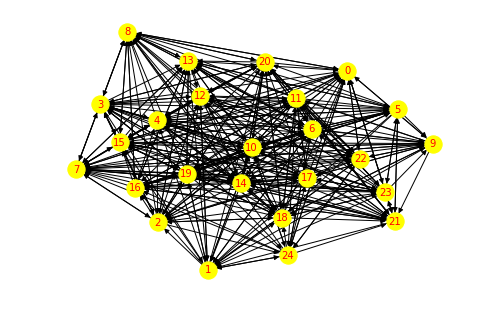

[2, 4, 6, 10, 12, 15, 16, 18, 19, 20, 22, 24]
Random Wander Score wurde aktualisiert
Die von unserem Algorithmus generierte Reihenfolge ist

13 8 10 19 7 15 3 21 6 18 2 0 20 14 4 16 11 5 12 1 23 9 22 17 24 

Die von der networkx Bibliothek generierte Reihenfolge lautet

8 10 13 19 7 15 21 3 6 18 0 2 14 20 4 16 11 12 5 1 23 9 22 17 24 

In [8]:
# notwendige imports
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd

# erzeuge ein Directed Graph
graph=nx.gnp_random_graph(25,0.6,directed=True)

# Male ein Graph
nx.draw(graph,with_labels=True,font_color='red',font_size=10,node_color='yellow')

# plot ein Graph

plt.show()

# Anzahl der Knoten für das Graph
count=graph.number_of_nodes()
# Nachbars Graph von ein Knoten 1
print(list(graph.neighbors(1)))

#Page Rank Algorithmus-Berechnung zufälligen "wander" score
rank_dict={}
x=rd.randint(0,25)
for j in range(0,25):
  rank_dict[j]=0
rank_dict[x]=rank_dict[x]+1
for i in range(600000):
  list_n=list(graph.neighbors(x))
  if(len(list_n)==0):
    x=rd.randint(0,25)
    rank_dict[x]=rank_dict[x]+1
  else:
    x=rd.choice(list_n)
    rank_dict[x]=rank_dict[x]+1
  
print("Random Wander Score wurde aktualisiert")

# Normierung der Werte
for j in range(0,25):
  rank_dict[j]=rank_dict[j]/600000

# Page rank der networkx Bibliothek
pagerank=nx.pagerank(graph)

# Sortieren beide dictionaries basierend auf Elemente
pagerank_sorted=sorted(pagerank.items(),key=lambda v:(v[1],v[0]),reverse=True)

pagerank_sorted

# Sortieren das rank_dict basierend auf Werte
rank_dict_sorted=sorted(rank_dict.items(),key=lambda v:(v[1],v[0]),reverse=True)

rank_dict_sorted

print("Die von unserem Algorithmus generierte Reihenfolge ist\n")
for i in rank_dict_sorted:
  print(i[0],end=" ")
print("\n\nDie von der networkx Bibliothek generierte Reihenfolge lautet\n")
for i in pagerank_sorted:
  print(i[0],end=" ")

## 3. Quellen

- [1] Teschl, G. and Teschl, S., 2013. Mathematik Für Informatiker. Berlin: Springer Vieweg.  
- [2] Kamesh Kota, S., 2020. How Google Search Works? Page Rank Algorithm Using Python. [online] Medium. Available at: <https://medium.com/analytics-vidhya/how-google-search-works-page-rank-algorithm-using-python-9643d9c9a981> [Accessed 13 December 2020].  
- [3] Geuss, M., 2020. [online] Youtube.com. Available at: <https://www.youtube.com/playlist?list=PLOhGw0qSQYd8bMBOu9bjMD4qq1noX-fUE> [Accessed 13 December 2020].
- [4] Ceri, S., Bozzon, A., Brambilla, M., Della Valle, E., Fraternali, P. and Quarteroni, S., n.d. Web Information Retrieval.
- [5] Page, L., Brin, S., 1999. The PageRank Citation Ranking: Bringing Order to the Web